# Two Particles Case (Euler and Symplectic)

In [1]:
#library
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi,sqrt

#function
def f(a,b):
    r = b-a
    r = sqrt(r[0]**2+r[1]**2)
    #r = sqrt(np.dot(r,r))
    return (G*m*(b-a))/(r**3)
def euler(x,v):
    x_k = x
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                x[i] += v[i]*dt
                v[i] += f(x_k[i],x_k[j])*dt
    return x,v
def symplectic(x,v):
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                v[i] += f(x[i],x[j])*dt
                x[i] += v[i]*dt
    return x,v
def init_two():
    x1 = ([R*cos(omega*t0),R*sin(omega*t0)])
    x2 = -np.copy(x1)
    v1 = ([omega*x1[1],omega*x1[0]])
    v2 = -np.copy(v1)
    x = np.array([x1,x2])
    v = np.array([v1,v2])
    return x,v

[[ 2.  0.]
 [-2. -0.]] 2.1798635733632965


C:\Users\hudan\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


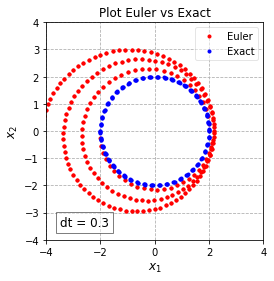

In [3]:
#parameter
m = 1. #kg
R = 2. #m
G = 6.67 #m/s^2
omega = sqrt((G*m)/(4*R**3)) #velocity
Period0=(2*np.pi)/omega
t0 = 0.
t = 30
Period = t/Period0
N = 100
dt = t/N
scale = 2*R
n_particles = 2

#initial condition
x,v = init_two()

#main loop
print(x,Period)
t = t0
xe = ([R*cos(omega*t),R*sin(omega*t)],[-R*cos(omega*t),-R*sin(omega*t)])
xe = np.array(xe)
for k in range(N):
    plt.plot(x[:,0],x[:,1], 'r.')
    plt.plot(xe[:,0],xe[:,1], 'b.')
    t = k*dt
    #plt.close('all')
    x,v = euler(x,v)
    xe = ([R*cos(omega*t),R*sin(omega*t)],[-R*cos(omega*t),-R*sin(omega*t)])
    xe = np.array(xe)
    plt.plot(x[:,0],x[:,1], 'r.')
    #plt.plot(xe[:,0],xe[:,1], 'b.')
    plt.xlim(right=scale,left=-scale)
    plt.ylim(top=scale,bottom=-scale)
    #filename='./figures/fig'+str(k)+'.png'
    #plt.savefig(filename)
    plt.axes(aspect='equal')
plt.plot(x[:,0],x[:,1], 'r.', label="Euler")
plt.plot(xe[:,0],xe[:,1], 'b.', label="Exact")
leg = plt.legend(loc='upper right', ncol=1, shadow=False, fancybox=True)
leg.get_frame().set_alpha(0.5)
inText = 'dt = ' + str(dt)
plt.grid(b=1, ls='--')
plt.title('Plot Euler vs Exact')
plt.xlabel(r'$x_1$', fontsize=12)
plt.ylabel(r'$x_2$', fontsize=12)
plt.text(-scale+.5, -scale+.5, inText, fontsize = 12, bbox=dict(facecolor='white', alpha=0.5))
plt.savefig("plot.png")
plt.show()

In [ ]:
m = 1. #kg
R = 2. #m
G = 6.7 #m/s^2
omega = sqrt((G*m)/(4*R**3)) #velocity
(2*np.pi)/omega
400/13.7

## Error Plot

In [ ]:
#parameter
m = 2. #kg
R = 2. #m
G = 9.8 #m/s^2
omega = sqrt((G*m)/(4*R**3))
t0 = 0.
t = 5.
Nlist = [10,20,30,50,100]

#initial condition
p1 = np.array([R*cos(omega*t0),R*sin(omega*t0)])
p2 = -np.copy(p1)
v1 = np.array([omega*p1[1],omega*p1[0]])
v2 = -np.copy(v1)

#main loop
for N in Nlist:
    dt = t/N
    for k in range(N):
        t = t0+k*dt
        p1,p2,v1,v2 = euler(p1,p2,v1,v2)
        p1e = [R*cos(omega*t),R*sin(omega*t)]
        p2e = [-R*cos(omega*t),-R*sin(omega*t)]
    err = (np.abs(p1-p1e))
    #print(dt,err)

# Many Body Case (Euler and Sympletic)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin,cos,pi,sqrt,exp

def f(a,b):
    r = b-a
    r = sqrt(r[0]**2+r[1]**2)
    #r = sqrt(np.dot(r,r))
    return (G*m*(b-a))/(r**3)

def euler(x,v):
    x_k = x
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                x[i] += v[i]*dt
                v[i] += f(x_k[i],x_k[j])*dt
    return x,v

def symplectic(x,v):
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                v[i] += f(x[i],x[j])*dt
                x[i] += v[i]*dt
    return x,v

def eulermod(x,v):
    x_k = x
    for i in range(n_particles):
        for j in range(n_particles):
            if(i!=j):    
                x[i] += v[i]*dt
                v[i] += f(x_k[i],x_k[j])*dt
        if (abs(x[i,0]) > scale) or (abs(x[i,0] < -scale)):
            v[i,0] = -v[i,0]
            x[i,0] += v[i,0]*dt
        if (abs(x[i,1]) > scale) or (abs(x[i,1] < -scale)):
            v[i,1] = -v[i,1]
            x[i,1] += v[i,1]*dt
    return x,v

def init_two():
    n_particles = 2
    x1 = ([R*cos(omega*t0),R*sin(omega*t0)])
    x2 = -np.copy(x1)
    v1 = ([omega*x1[1],omega*x1[0]])
    v2 = -np.copy(v1)
    x = np.array([x1,x2])
    v = np.array([v1,v2])
    return x,v

def get_init_coordinates():
    x = np.zeros((n_particles,d))
    for i in range(n_particles):
        if (i%2):
            x[i] = ([R*cos(omega*t0),R*sin(omega*t0)])
        elif (i%2==0):
            x[i] = ([-R*cos(omega*t0),-R*sin(omega*t0)])
    return x

def get_init_coordinates2():
    x = np.zeros((n_particles,d))
    for i in range(n_particles):
        if (i%2):
            x[i] = ([i*R*cos(omega*t0),i*R*sin(omega*t0)])
        elif (i%2==0):
            x[i] = ([-i*R*cos(omega*t0),-i*R*sin(omega*t0)])
    return x

def get_coordinates():
    x = np.zeros((n_particles,d))
    for i in range(n_particles):
        rho = np.random.rand()
        x[i] = ([R*exp(rho)*exp(cos(omega*t0)),R*exp(rho)*exp(sin(omega*t0))])
    return x

def get_init_velocities():
    v = np.zeros((n_particles,d))
    for i in range(n_particles):
        v[i] = ([0.0,0.0])
    return v

13.762329150586798 1376
[[-2. -0.]
 [ 2.  0.]]


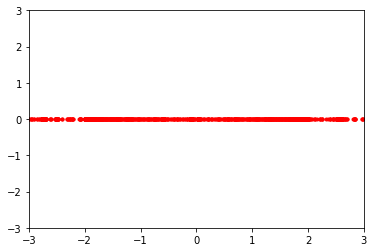

In [11]:
#parameter
m = 1. #kg
R = 2. #m
G = 6.67 #m/s^2
omega = sqrt((G*m)/(4*R**3)) #velocities
d = 2 #dimension
n_particles = 2 #particles
t0 = 0.
t = 2.0*pi/omega
dt = 0.01
N = np.int(np.floor(t/dt))
scale = 1.5*R
print(t,N)
#initial condition
#x,v = init_two()
x = get_init_coordinates()
v = get_init_velocities()
#main loop
print(x)
for k in range(N):
    #plt.close('all')
    x,v = eulermod(x,v)
    plt.plot(x[:,0],x[:,1], 'r.')
    plt.xlim(right=scale,left=-scale)
    plt.ylim(top=scale,bottom=-scale)
    #filename='./figures/fig'+str(k)+'.png'
    #plt.savefig(filename)
    #plt.axes(aspect='equal')
plt.show()

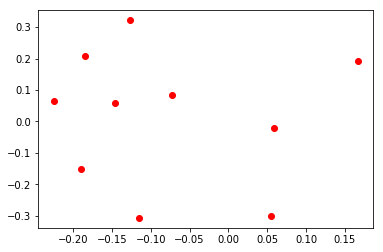

ValueError: operands could not be broadcast together with shapes (10,) (2,) 

In [13]:
d = 2 #dimension
n_particles = 10 #particles
x = np.zeros((n_particles,d))
mu, sigma = 0, 0.1 # mean and standard deviation
x[:,0] = R*np.random.normal(mu, sigma, n_particles)
x[:,1] = R*np.random.normal(mu, sigma, n_particles)
m = np.random.normal(mu, sigma, n_particles)
plt.plot(x[:,0],x[:,1], 'ro')
plt.show()
v = get_init_velocities()
dt = 0.01

for k in range(100):
    plt.close('all')
    x,v = euler(x,v)
    plt.plot(x[:,0],x[:,1], 'ro')
    plt.xlim(right=scale,left=-scale)
    plt.ylim(top=scale,bottom=-scale)
    filename='./figures/fig'+str(k)+'.png'
    plt.savefig(filename)
    #plt.axes(aspect='equal')
plt.show()

In [14]:
mu, sigma = 0, 0.1 # mean and standard deviation
R*np.random.normal(mu, sigma, 1000)

array([ 1.21518669e-01, -1.01780132e-01, -7.51691571e-02, -5.94894189e-02,
        2.57152857e-01,  2.09801125e-02, -2.33927012e-01, -2.28274387e-01,
        6.17382883e-02,  2.39086440e-01, -2.17735988e-02, -1.09269872e-02,
       -1.58181454e-01, -1.56553246e-01,  1.55487762e-01,  1.71433392e-01,
       -2.01836202e-01, -6.34637915e-02,  5.33039344e-02, -6.16951169e-02,
        6.15694365e-02, -2.10851555e-01, -1.42349352e-01, -5.90011424e-02,
        3.68005085e-02, -4.67390158e-02,  1.02685558e-01, -1.65963412e-01,
        2.73349553e-01, -7.92982532e-02, -1.93824545e-01, -3.71259914e-02,
       -1.09834425e-01, -1.72110406e-02, -8.08121878e-02,  1.00550556e-01,
        1.92456533e-01, -1.15823499e-01, -3.30304338e-02, -1.19993489e-01,
       -1.64687310e-01,  7.80597109e-03,  3.07717218e-01, -3.57648652e-01,
        4.55567089e-01,  6.97326319e-02, -1.61105141e-02,  2.16938432e-01,
        3.18285832e-01,  1.02151386e-01,  6.81645438e-02, -2.41226408e-01,
        1.72237939e-01, -

Time for running  500 iteration : 873.2497067451477 seconds


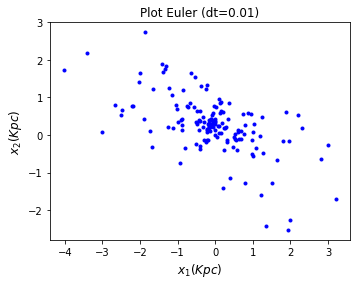

In [14]:
import matplotlib.pyplot as plt
from numpy import sin,cos,pi,sqrt,exp,floor,zeros
from numpy.random import normal, randn
from numpy.linalg import norm
from random import uniform
from time import time
from mpmath import sech

start = time()
def euler_bound(x,v):
    for i in range(n_particles):
        x[i] += v[i]*dt
        for j in range(n_particles):
            if(i!=j):
                a = norm(f(x[i],x[j]))
                muv = mu(a/a_0)
                #print(a,muv)
                v[i] += (f(x[i],x[j])/muv)*dt
        if (norm(x[i]) > R) or (norm(x[i]) < -R):
            v[i] = -v[i]
            x[i] += v[i]*dt
def euler(x,v):
    x_k = x
    for i in range(n_particles):
        x[i] += v[i]*dt
        for j in range(n_particles):
            if(i!=j):
                a = norm(f(x_k[i],x_k[j]))
                muv = mu(a/a_0)
                #print(a,muv)
                v[i] += (f(x_k[i],x_k[j])/muv)*dt

def euler_newton(x,v):
    x_k = x
    for i in range(n_particles):
        x[i] += v[i]*dt
        for j in range(n_particles):
            if(i!=j):
                v[i] += (f(x_k[i],x_k[j]))*dt
                

def symplectic(x,v):
    for i in range(n_particles):
        x[i] += v[i]*dt
        for j in range(n_particles):
            if(i!=j):    
                v[i] += f(x[i],x[j])*dt
    for i in range(n_particles):
        x[i] += v[i]*dt
    
def get_init_coordinates():
    x = zeros((n_particles,d))
    i = 0
    while(i<n_particles):
        t = i*dt
        x1 = (normal(-R,R)*cos(omega*t))
        x2 = (normal(-R,R)*sin(omega*t))
        if(abs(x1**2+x2**2)<R**2):
            x[i] = ([x1,x2])
            i+=1
        else:
            i=i
    return x
def get_distribution():
    x = get_init_coordinates()
    rho = zeros((n_particles,d))
    i = 0
    while(i<n_particles):
        rho[i] = [(M_total/(pi*R**2))*exp(-x[i,0]/R)*sech(x[i,1]/2)**2,(M_total/(pi*R**2))*exp(-x[i,0]/R)*sech((x[i,1]/R))**2]
        i += 1
    return rho,x

def get_init_velocities():
    v = zeros((n_particles,d))
    for i in range(n_particles):
        t = i*dt
        v[i] = [(-(1/sqrt(rho[i,0]))*omega*sin(omega*t)),((1/sqrt(rho[i,1]))*omega*cos(omega*t))]
    return v
def f(xi,xj):
    rij = xj-xi
    return (G*m*(rij))/(norm(rij)+epsilon)**3
def mu(s):
    return s/sqrt(1+s**2)

#Global parameter
n_particles = 150 #particles
d = 2 #dimension
m = 10e11/n_particles #[MO]
M_total = m*n_particles
R = 2.9 #[kpc]
G = 13.34*10e-11 #[kpc^3 MO^-1 gy^-2]
omega = normal(0,2*pi) #velocities
epsilon = 1.7
T = 5
dt = 0.01
t = 0. #
N = int(floor(T/dt))
scale = 6.0
a_0 =  2e-10
#initial condition
#x,v = init_two()
rho,x = get_distribution()
#print(rho)
v = get_init_velocities()
#main loop
for k in range(N):
    euler_newton(x,v)
    plt.plot(x[:,0],x[:,1], 'b.')
    plt.xlim(right=scale,left=-scale)
    plt.ylim(top=scale,bottom=-scale)
    #plt.axes(aspect='equal')
    #plt.plot(particle[:,0],particle[:,1], 'b.')
    no = str(k)
    filename='./figures/plotqbb'+no+'.png'
    plt.savefig(filename)
    plt.close()
plt.xlim(right=scale,left=-scale)
plt.ylim(top=scale,bottom=-scale)
plt.axes(aspect='equal')
plt.title('Plot Euler (dt='+str(dt)+')')
plt.xlabel(r'$x_1(Kpc)$', fontsize=12)
plt.ylabel(r'$x_2(Kpc)$', fontsize=12)
plt.plot(x[:,0],x[:,1], 'b.')
print("Time for running ", N, "iteration :", time()-start, "seconds")
plt.show()